## Librerias Utilizadas

In [515]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import svm, datasets, ensemble
from sklearn.model_selection import train_test_split
from numpy import mean
from numpy import std
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score, recall_score, f1_score, accuracy_score,roc_curve,classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score,LeaveOneOut





## Apartado B Comparativa de modelos 

### Cargando los datos

In [412]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
#Obligamos que meutre todas las columnas
pd.set_option('display.max_columns', None)

# Visualitzarem només 3 decimals per mostra
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

# Carreguem dataset d'exemple
dataset = load_dataset('..\\db\heart.csv')
data = dataset.values


## Comparativa de modelos 

Correct classification Logistic  0.5 % of the data:  0.7105263157894737
Correct classification SVM       0.5 % of the data:  0.631578947368421
Correct classification Logistic  0.7 % of the data:  0.7692307692307693
Correct classification SVM       0.7 % of the data:  0.6703296703296703
Correct classification Logistic  0.8 % of the data:  0.7540983606557377
Correct classification SVM       0.8 % of the data:  0.6721311475409836


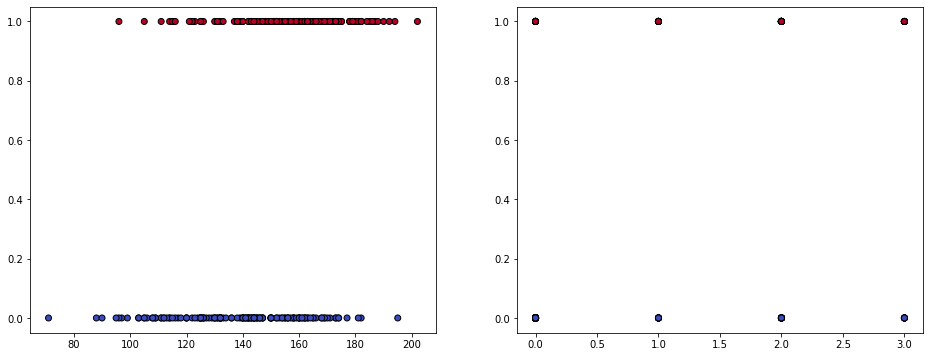

In [413]:
# Take the first 5 features. We could avoid this by using a two-dim dataset
X =  dataset[['thalachh','cp']].values
#X =  dataset[['thalachh','cp','slp','exng','oldpeak','caa','thall']].values
#X =  dataset[['thalachh','cp','slp','exng','oldpeak']].values
y = dataset['output']

n_classes = 2
    
fig, sub = plt.subplots(1, 2, figsize=(16,6))
sub[0].scatter(X[:,0], y, c=y, cmap=plt.cm.coolwarm, edgecolors='k')
sub[1].scatter(X[:,1], y, c=y, cmap=plt.cm.coolwarm, edgecolors='k')


particions = [0.5, 0.7, 0.8]

for part in particions:
    x_t, x_v, y_t, y_v = train_test_split(X, y, train_size=part)
    
    #Creacion del regresor logistico 
    logireg = LogisticRegression(C=2.0, fit_intercept=True, penalty='l2', tol=0.001)

    # Entrenamiento
    logireg.fit(x_t, y_t)

    print ("Correct classification Logistic ", part, "% of the data: ", logireg.score(x_v, y_v))
    
    #Utilizacion de máquinas de vectores de soporte
    svc = svm.SVC(C=10.0, kernel='rbf', gamma=0.9, probability=True)

    # Entrenamiento 
    svc.fit(x_t, y_t)
    probs = svc.predict_proba(x_v)
    print ("Correct classification SVM      ", part, "% of the data: ", svc.score(x_v, y_v))



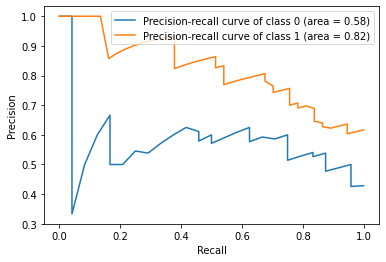

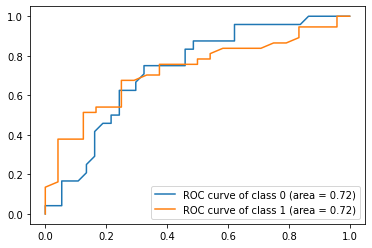

In [414]:
from sklearn.metrics import f1_score, precision_recall_curve, average_precision_score, roc_curve, auc

# Compute Precision-Recall and plot curve
precision = {}
recall = {}
average_precision = {}
plt.figure()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_v == i, probs[:, i])
    average_precision[i] = average_precision_score(y_v == i, probs[:, i])

    plt.plot(recall[i], precision[i],
    label='Precision-recall curve of class {0} (area = {1:0.2f})'
                           ''.format(i, average_precision[i]))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc="upper right")

    
# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_v == i, probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
# Plot ROC curve
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})' ''.format(i, roc_auc[i]))
plt.legend()

In [415]:
import numpy as np
import matplotlib.pyplot as plt


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def show_C_effect(C=1.0, gamma=0.7, degree=3):

  
    
    # Take the first two features. We could avoid this by using a two-dim dataset
    X = data[:, :2]
    y = dataset['output']

    # we create an instance of SVM and fit out data. We do not scale our
    # data since we want to plot the support vectors
    # title for the plots
    titles = ('SVC with linear kernel',
              'LinearSVC (linear kernel)',
              'SVC with RBF kernel',
              'SVC with polynomial (degree 3) kernel')

    #C = 1.0  # SVM regularization parameter
    models = (svm.SVC(kernel='linear', C=C),
              svm.LinearSVC(C=C, max_iter=1000000),
              svm.SVC(kernel='rbf', gamma=gamma, C=C),
              svm.SVC(kernel='poly', degree=degree, gamma='auto', C=C))
    models = (clf.fit(X, y) for clf in models)

    plt.close('all')
    fig, sub = plt.subplots(2, 2, figsize=(14,9))
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    X0, X1= X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    for clf, title, ax in zip(models, titles, sub.flatten()):
        plot_contours(ax, clf, xx, yy,
                      cmap=plt.cm.coolwarm, alpha=0.8)
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xlabel('Frecuencia cardíaca máxima alcanzada')
        ax.set_ylabel('Tipo de dolor en el pecho')
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(title)

    plt.show()


In [416]:
#Si realizamos variaciones con los numero obtenermos mejores resultados en algunos modelos 
#pero penalizamos otros.
#show_C_effect(C=0.1)

# Apartado A Clasificación Numérica

## 1. Implementacion de EDA (exploratory data analysis)

## Información del dataset

In [417]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Información de los primeros 5 elementos

In [418]:
dataset.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.300,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600,2,0,2,1


### Estadística de los datos


In [419]:
dataset.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000
mean,54.366,0.683,0.967,131.624,246.264,0.149,0.528,149.647,0.327,1.040,1.399,0.729,2.314,0.545
std,9.082,0.466,1.032,17.538,51.831,0.356,0.526,22.905,0.470,1.161,0.616,1.023,0.612,0.499
min,29.000,0.000,0.000,94.000,126.000,0.000,0.000,71.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,47.500,0.000,0.000,120.000,211.000,0.000,0.000,133.500,0.000,0.000,1.000,0.000,2.000,0.000
50%,55.000,1.000,1.000,130.000,240.000,0.000,1.000,153.000,0.000,0.800,1.000,0.000,2.000,1.000
75%,61.000,1.000,2.000,140.000,274.500,0.000,1.000,166.000,1.000,1.600,2.000,1.000,3.000,1.000
max,77.000,1.000,3.000,200.000,564.000,1.000,2.000,202.000,1.000,6.200,2.000,4.000,3.000,1.000


### Dimensión del dataframe


In [420]:
dataset.shape

(303, 14)

## Exploración de datos

#### Frecuencia de padecer del corazon según el edad

C:\Users\Luis Fernando\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='output'>

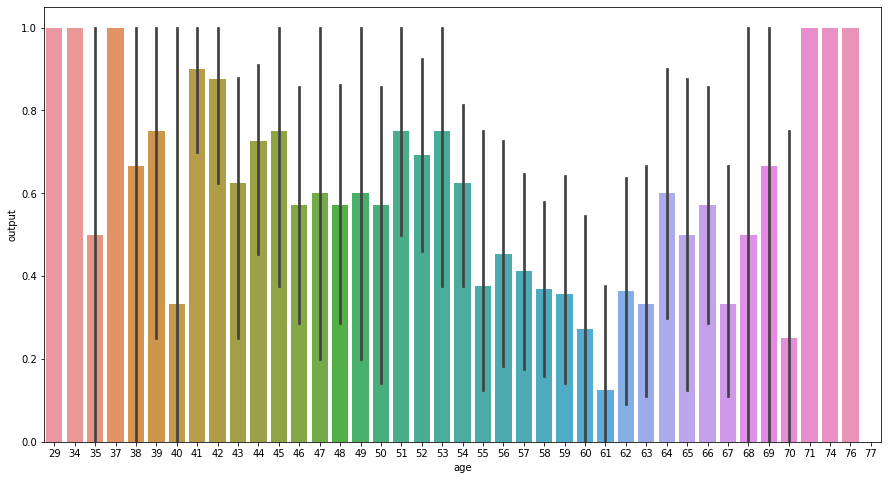

In [421]:
fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(dataset['age'],dataset['output'],ax=ax)



#### Frecuencia cardíaca máxima alcanzada segun la edad

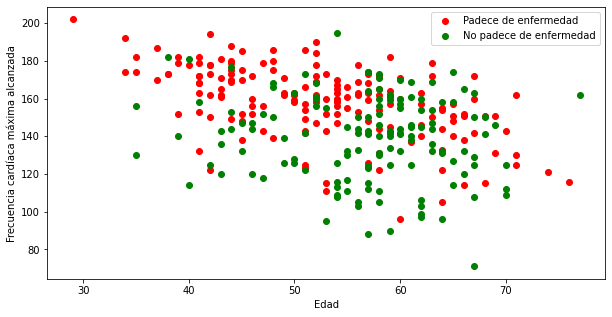

In [422]:
plt.subplots(figsize=(10, 5))
plt.scatter(x=dataset.age[dataset.output==1], y=dataset.thalachh[(dataset.output==1)], c="red")
plt.scatter(x=dataset.age[dataset.output==0], y=dataset.thalachh[(dataset.output==0)], c="green")
plt.legend(["Padece de enfermedad", "No padece de enfermedad"])
plt.xlabel("Edad")
plt.ylabel("Frecuencia cardíaca máxima alcanzada")
plt.show()

#### Frecuencia de padecer del corazon según el sexo

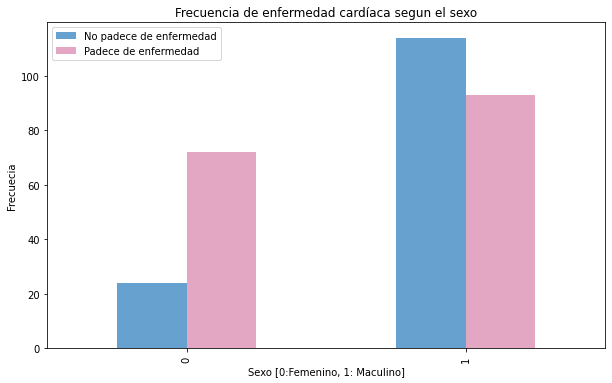

In [423]:
pd.crosstab(dataset.sex,dataset.output).plot(kind="bar",figsize=(10,6),color=['#67a1cf','#e3a6c3' ])
plt.title('Frecuencia de enfermedad cardíaca segun el sexo')
plt.xlabel('Sexo [0:Femenino, 1: Maculino]')
plt.legend(["No padece de enfermedad", "Padece de enfermedad"])
plt.ylabel('Frecuecia')
plt.show()

#### Frecuencia de padecer del corazon según el tipo de dolor en el pecho

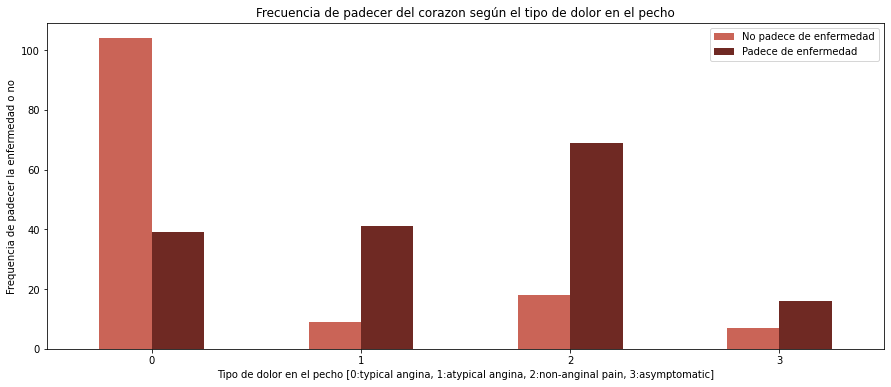

In [424]:
pd.crosstab(dataset.cp,dataset.output).plot(kind="bar",figsize=(15,6),color=['#ca6457','#6f2923' ])
plt.title('Frecuencia de padecer del corazon según el tipo de dolor en el pecho')
plt.legend(["No padece de enfermedad", "Padece de enfermedad"])
plt.xlabel('Tipo de dolor en el pecho [0:typical angina, 1:atypical angina, 2:non-anginal pain, 3:asymptomatic]')
plt.xticks(rotation = 0)
plt.ylabel('Frequencia de padecer la enfermedad o no')
plt.show()

#### Frecuencia de padecer del corazon según el nivel de azucar en sangre

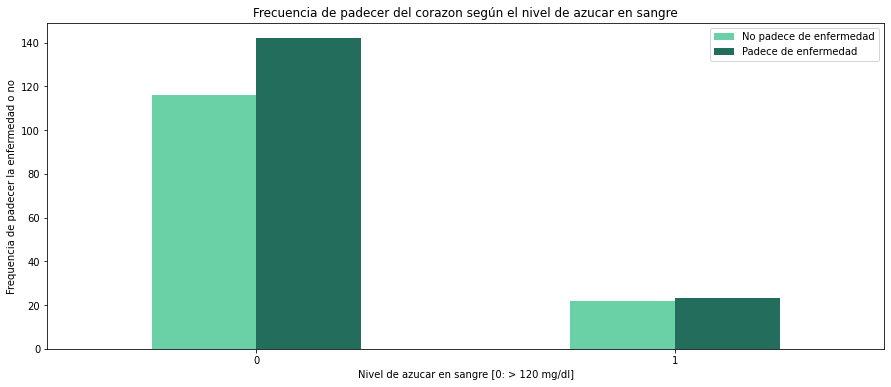

In [425]:
pd.crosstab(dataset.fbs,dataset.output).plot(kind="bar",figsize=(15,6),color=['#6ad0a6','#226d5c' ])
plt.title('Frecuencia de padecer del corazon según el nivel de azucar en sangre')
plt.legend(["No padece de enfermedad", "Padece de enfermedad"])
plt.xlabel('Nivel de azucar en sangre [0: > 120 mg/dl]')
plt.xticks(rotation = 0)
plt.ylabel('Frequencia de padecer la enfermedad o no')
plt.show()

#### Frecuencia de padecer del corazon según resultados electrocardiográficos en reposo

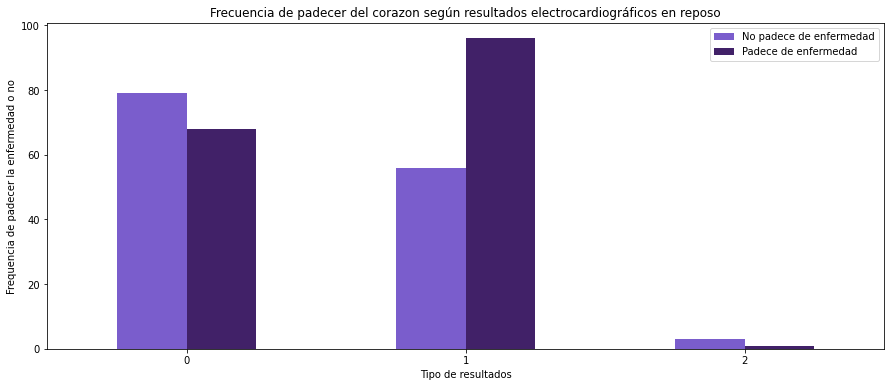

In [426]:
pd.crosstab(dataset.restecg,dataset.output).plot(kind="bar",figsize=(15,6),color=['#7a5dcc','#412168' ])
plt.title('Frecuencia de padecer del corazon según resultados electrocardiográficos en reposo')
plt.legend(["No padece de enfermedad", "Padece de enfermedad"])
plt.xlabel('Tipo de resultados')
plt.xticks(rotation = 0)
plt.ylabel('Frequencia de padecer la enfermedad o no')
plt.show()

### Frecuencia de padecer del corazon según Talisemia

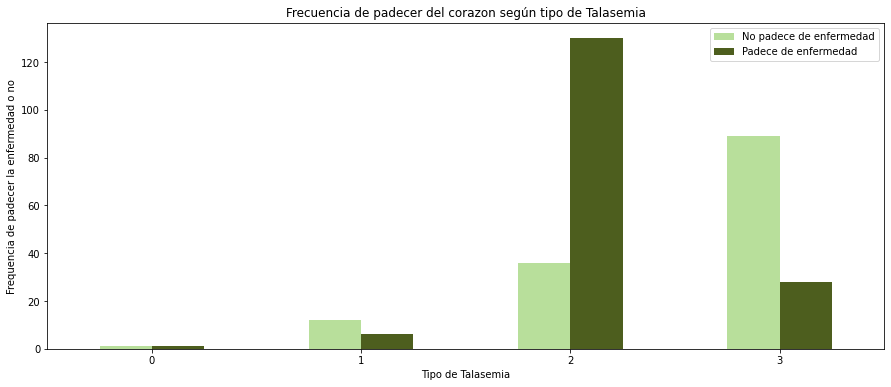

In [427]:
pd.crosstab(dataset.thall,dataset.output).plot(kind="bar",figsize=(15,6),color=['#b8df9b','#4d5e1e' ])
plt.title('Frecuencia de padecer del corazon según tipo de Talasemia')
plt.legend(["No padece de enfermedad", "Padece de enfermedad"])
plt.xlabel('Tipo de Talasemia')
plt.xticks(rotation = 0)
plt.ylabel('Frequencia de padecer la enfermedad o no')
plt.show()

### Analisis de Multivariables

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trtbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalachh'}>],
       [<AxesSubplot:title={'center':'exng'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slp'}>,
        <AxesSubplot:title={'center':'caa'}>],
       [<AxesSubplot:title={'center':'thall'}>,
        <AxesSubplot:title={'center':'output'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

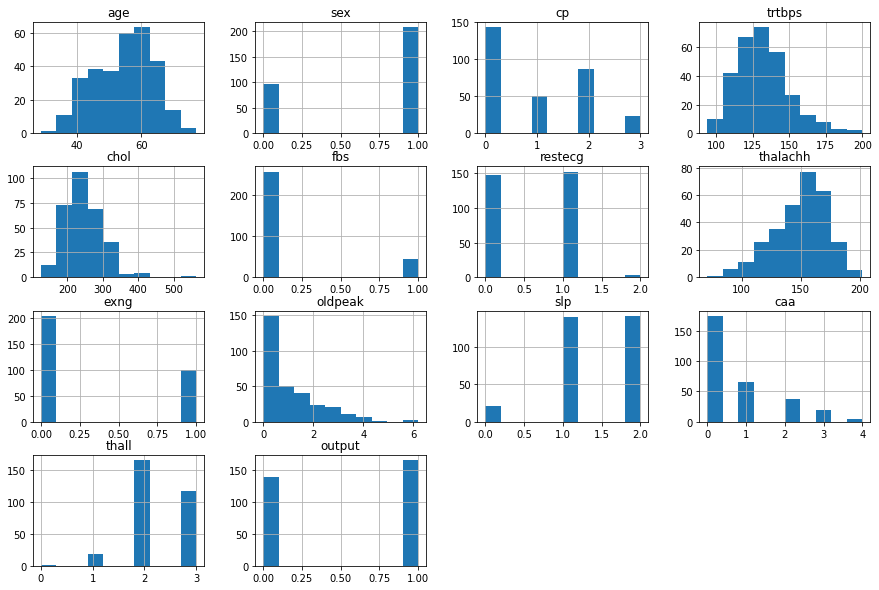

In [428]:
dataset.hist(figsize=(15,10))

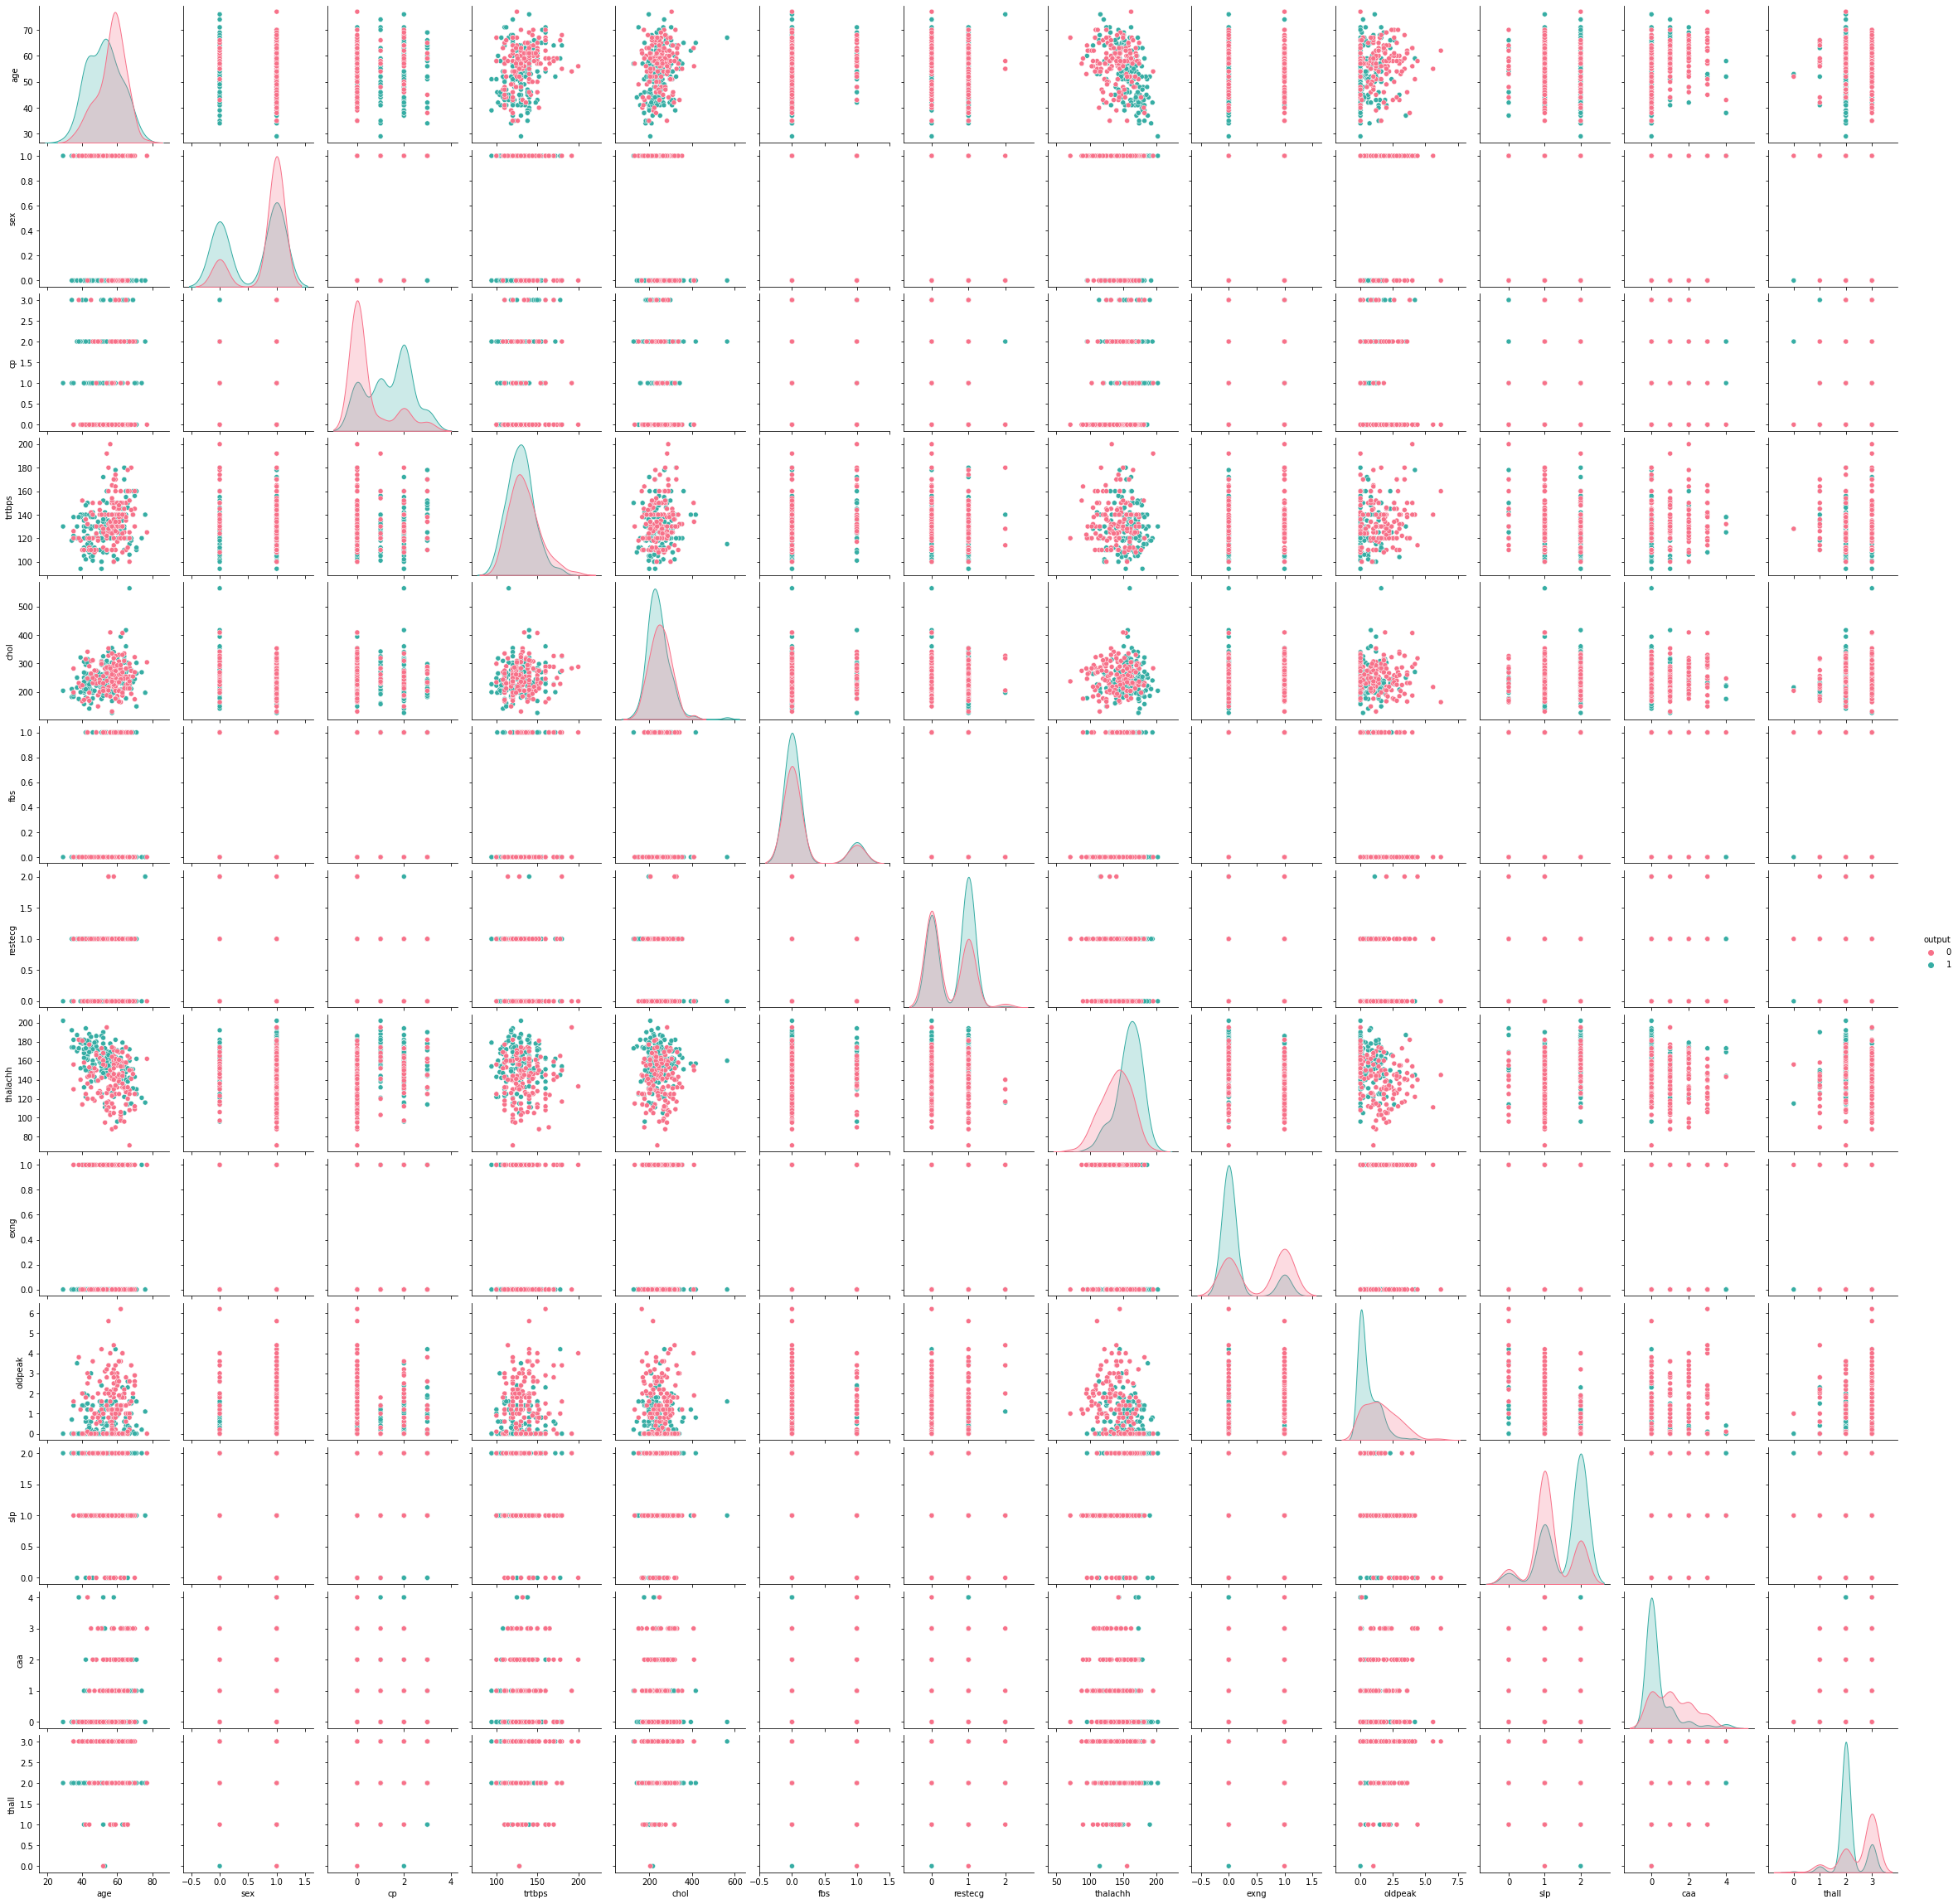

In [429]:
sns.pairplot(dataset, hue='output', diag_kind = "kde", kind = "scatter", palette = "husl")

### Correlación de los atributos

<AxesSubplot:>

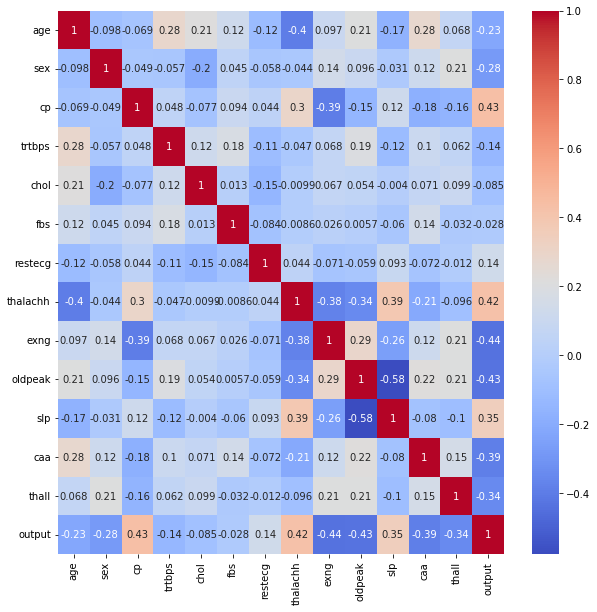

In [430]:
correlacion = dataset.iloc[:].corr()
fig , ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(10)
sns.heatmap(correlacion,annot=True,cmap="coolwarm")

## 2. Preprocessing

### Valores Nulos

<AxesSubplot:>

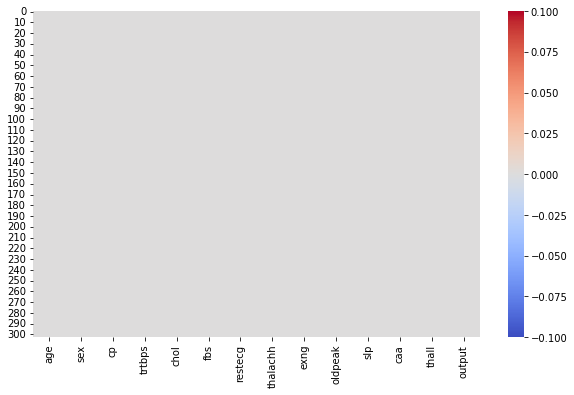

In [431]:
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(dataset.isnull(),cmap="coolwarm",ax=ax)

#### Eliminacion de los valores nulos

In [432]:
def columns_with_na(dframe):
    temp = dframe.isna().sum()
    temp = temp[temp >0]
    print(f"Columns containing nan values:{temp.index}")
    return temp.index

columns_to_drop = list(columns_with_na(dataset))
dataset.drop(columns_to_drop, axis=1, inplace = True)

Columns containing nan values:Index([], dtype='object')


### Visualizacion de valores atípicos

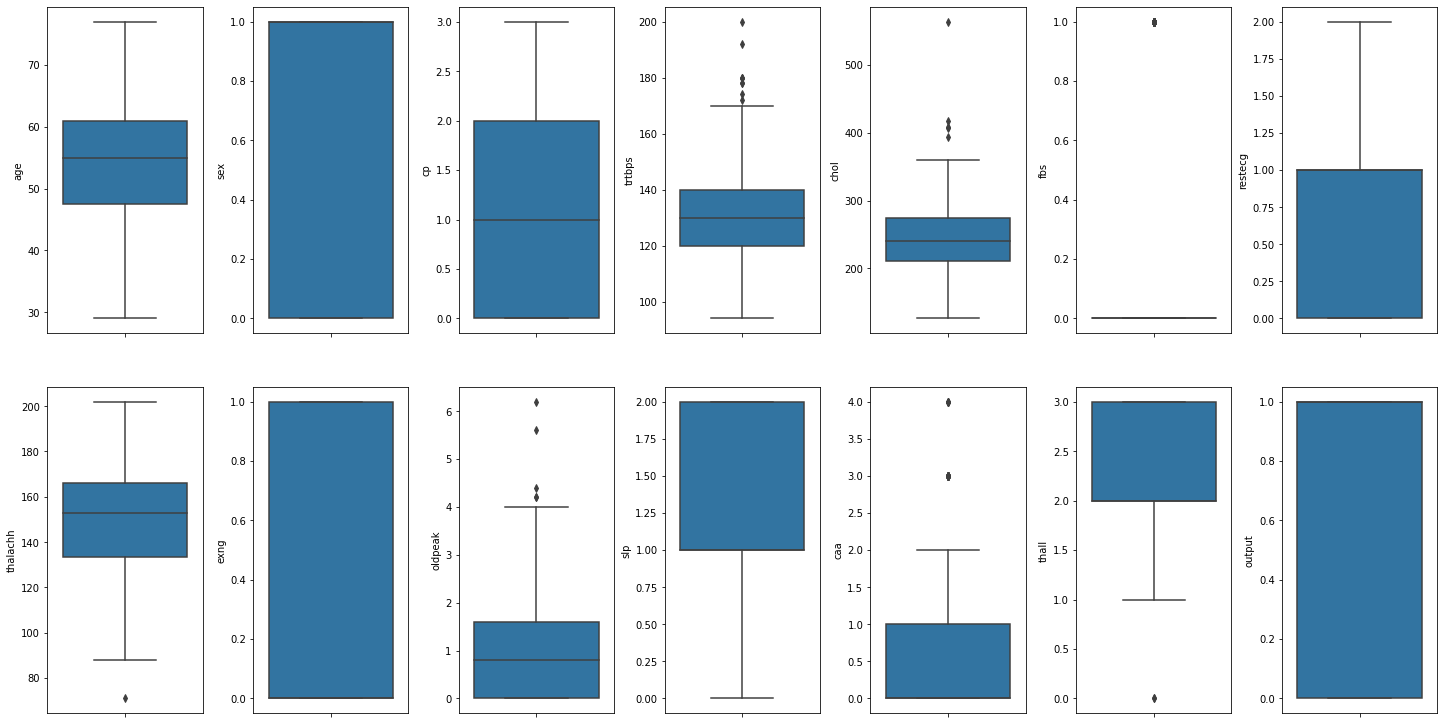

In [433]:
fig, ax = plt.subplots(ncols = 7, nrows = 2, figsize = (20, 10))
index = 0
ax = ax.flatten()

for col, value in dataset.items():
    sns.boxplot(y=col, data=dataset, ax=ax[index])
    index += 1
plt.tight_layout(pad = 0.5, w_pad=0.7, h_pad=5.0)

In [434]:
dataset.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.300,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600,2,0,2,1


### Normalización de los datos

In [435]:
dataset_norm=dataset.copy()

columnas = ['trtbps', 'chol', 'thalachh', 'oldpeak', 'age']
for col in columnas:
    minimum = min(dataset_norm[col])
    maximum = max(dataset_norm[col])
    dataset_norm[col] = (dataset_norm[col] - minimum)/ (maximum - minimum)

In [436]:
#Este tipo de normalizacion nos genera valores negativos.
df=dataset
def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)

df_mean_norm = mean_norm(df)
df_mean_norm

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0.951,0.680,1.970,0.763,-0.256,2.390,-1.004,0.015,-0.695,1.086,-2.271,-0.713,-2.145,0.913
1,-1.912,0.680,1.001,-0.093,0.072,-0.417,0.897,1.631,-0.695,2.119,-2.271,-0.713,-0.512,0.913
2,-1.472,-1.466,0.032,-0.093,-0.815,-0.417,-1.004,0.976,-0.695,0.310,0.975,-0.713,-0.512,0.913
3,0.180,0.680,0.032,-0.663,-0.198,-0.417,0.897,1.238,-0.695,-0.206,0.975,-0.713,-0.512,0.913
4,0.290,-1.466,-0.937,-0.663,2.079,-0.417,0.897,0.583,1.433,-0.379,0.975,-0.713,-0.512,0.913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290,-1.466,-0.937,0.478,-0.102,-0.417,0.897,-1.163,1.433,-0.723,-0.648,-0.713,1.121,-1.092
299,-1.031,0.680,1.970,-1.233,0.342,-0.417,0.897,-0.770,-0.695,0.138,-0.648,-0.713,1.121,-1.092
300,1.501,0.680,-0.937,0.706,-1.028,2.390,0.897,-0.378,-0.695,2.033,-0.648,1.243,1.121,-1.092
301,0.290,0.680,-0.937,-0.093,-2.224,-0.417,0.897,-1.513,1.433,0.138,-0.648,0.265,1.121,-1.092


### Visualización después de normalizar

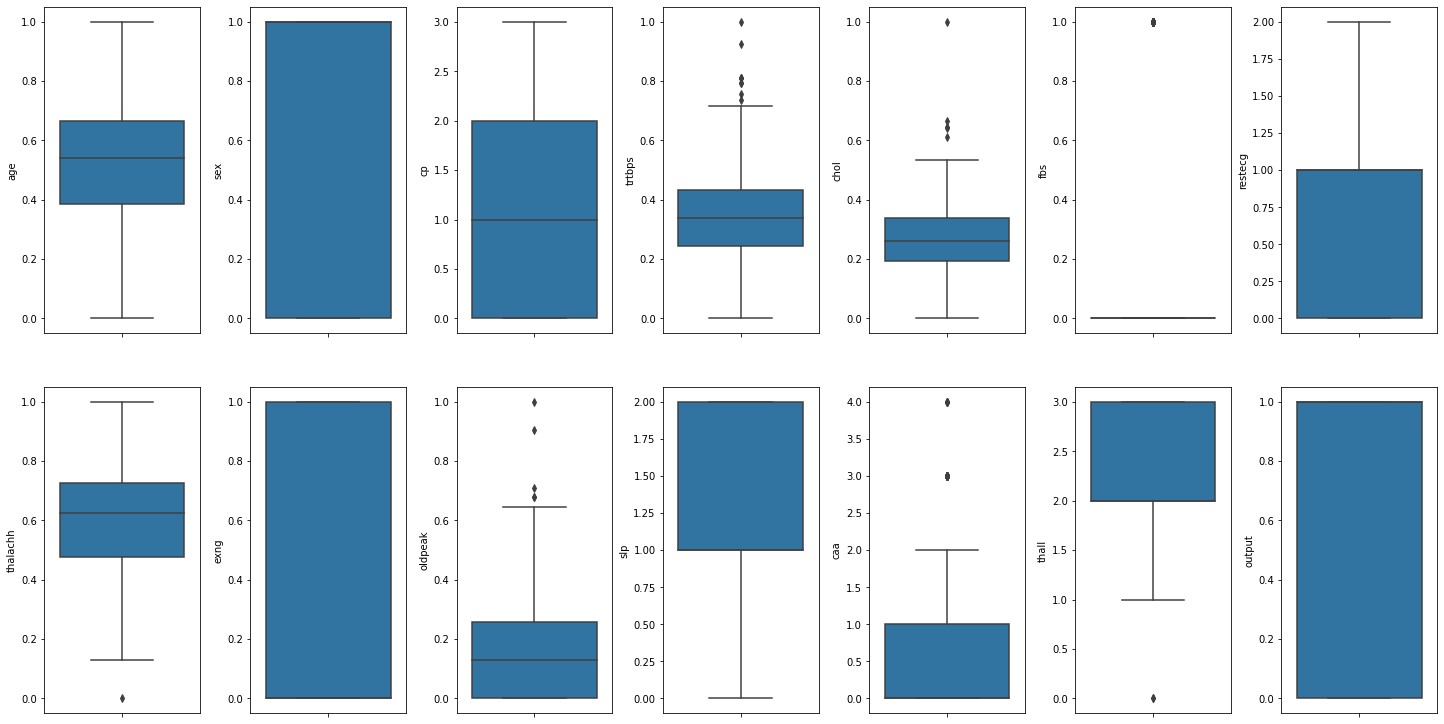

In [437]:
fig, ax = plt.subplots(ncols = 7, nrows = 2, figsize = (20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=dataset_norm, ax=ax[index])
    index += 1
plt.tight_layout(pad = 0.5, w_pad=0.7, h_pad=5.0)

### Agregamos columnas categoricas a partir de valores categoricos

In [438]:
df_sense = dataset.copy()
df_sense.drop(['sex', 'chol', 'restecg', 'fbs'], axis=1, inplace=True)
df_sense.head()

,age,cp,trtbps,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,3,145,150,0,2.300,0,0,1,1
1,37,2,130,187,0,3.500,0,0,2,1
2,41,1,130,172,0,1.400,2,0,2,1
3,56,1,120,178,0,0.800,2,0,2,1
4,57,0,120,163,1,0.600,2,0,2,1


In [439]:
one_hot_data=df_sense.copy()
one_hot_data.head()

,age,cp,trtbps,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,3,145,150,0,2.300,0,0,1,1
1,37,2,130,187,0,3.500,0,0,2,1
2,41,1,130,172,0,1.400,2,0,2,1
3,56,1,120,178,0,0.800,2,0,2,1
4,57,0,120,163,1,0.600,2,0,2,1


In [440]:
#CP: type of chest pain 
one_hot_data.loc[one_hot_data['cp'] == 0, 'cp'] = 'typical angina'
one_hot_data.loc[one_hot_data['cp'] == 1, 'cp'] = 'atypical angina'
one_hot_data.loc[one_hot_data['cp'] == 2, 'cp'] = 'non-anginal pain'
one_hot_data.loc[one_hot_data['cp'] == 3, 'cp'] = 'asymptomatic'
# enxercise induced angina
one_hot_data.loc[one_hot_data['exng'] == 1, 'exng'] = 'yes'
one_hot_data.loc[one_hot_data['exng'] == 0, 'exng'] = 'no'
#slope of peak exercise ST segment
one_hot_data.loc[one_hot_data['slp'] == 0, 'slp'] = 'upsloping'
one_hot_data.loc[one_hot_data['slp'] == 1, 'slp'] = 'flat'
one_hot_data.loc[one_hot_data['slp'] == 2, 'slp'] = 'downsloping'
#thalassemia blood disorder
one_hot_data.loc[one_hot_data['thall'] == 0, 'thall'] = 'None'
one_hot_data.loc[one_hot_data['thall'] == 1, 'thall'] = 'fixed defect'
one_hot_data.loc[one_hot_data['thall'] == 2, 'thall'] = 'normal blood flow'
one_hot_data.loc[one_hot_data['thall'] == 3, 'thall'] = 'reversible defect'



### Codificacion con One Hot Encoding

In [441]:
X=one_hot_data.iloc[:, :-1]
y=one_hot_data.iloc[:, -1]

#Entrenando al modelo
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=1, stratify=y)

In [442]:
encoding_cols = ['cp', 'exng', 'slp', 'thall']

oh_encode = OneHotEncoder(handle_unknown = 'ignore', sparse = False)

x_train_encoded = pd.DataFrame(oh_encode.fit_transform(x_train[encoding_cols]), index = x_train.index)
x_test_encoded = pd.DataFrame(oh_encode.transform(x_test[encoding_cols]), index = x_test.index)

x_train_num = x_train.drop(['cp', 'exng', 'slp', 'thall'], axis=1)
x_test_num = x_test.drop(['cp', 'exng', 'slp', 'thall'], axis=1)

x_train_en = pd.concat([x_train_num, x_train_encoded], axis=1)
x_test_en = pd.concat([x_test_num, x_test_encoded], axis=1)

In [443]:
x_train_en.head()

,age,trtbps,thalachh,oldpeak,caa,0,1,2,3,4,5,6,7,8,9,10,11,12
212,39,118,140,1.200,0,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000
8,52,172,162,0.500,0,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000
4,57,120,163,0.600,0,0.000,0.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000
5,57,140,148,0.400,0,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000
116,41,130,168,2.000,0,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000


## 3. Model Selection

### Preparacion del modelo

In [444]:
modelos = pd.DataFrame(columns=["Modelo","Precision"])

In [445]:
X=dataset_norm.drop('output', axis=1)
#Variable Objetivo
y=dataset_norm['output']
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,random_state=42)

In [446]:
X.shape

(303, 13)

In [447]:
y.shape

(303,)

### Regresion Logistica

In [448]:
#Modelo
modelo=LogisticRegression(max_iter=200,random_state=0,n_jobs=30)
#Entrenamiento del modelo
modelo.fit(X_train,y_train)
#Prediccion en base al training test
prediccion=modelo.predict(X_test)
#Accuracy obtenido
acc=accuracy_score(y_test,prediccion)
valor={"Modelo":"Regresion Logistica","Precision":acc}
modelos=modelos.append(valor,ignore_index=True)
acc

0.8360655737704918

#### Matriz de confusion 

<AxesSubplot:>

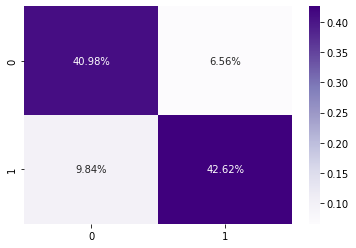

In [449]:
cm_rl=confusion_matrix(y_test,prediccion)
sns.heatmap(cm_rl/np.sum(cm_rl),annot = True, fmt=  '0.2%',cmap ='Purples')

### SMV

#### SMV kernel: rbf

In [450]:
#Modelo
modelo_svm = SVC(kernel='rbf', random_state = 42)
#Entrenamiento del modelo
modelo_svm.fit(X_train,y_train)
#Prediccion en base al training test
prediccion_svg=modelo_svm.predict(X_test)
#Accuracy obtenido
acc_svg=accuracy_score(y_test,prediccion_svg)
valor={"Modelo":"SVG_rbf","Precision":acc_svg}
modelos=modelos.append(valor,ignore_index=True)
acc_svg

0.8688524590163934

<AxesSubplot:>

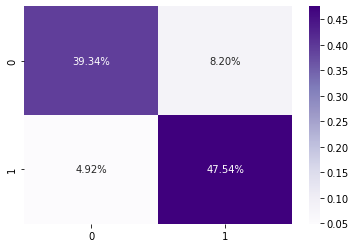

In [451]:
cm_svg=confusion_matrix(y_test,prediccion_svg)
sns.heatmap(cm_svg/np.sum(cm_svg),annot = True, fmt=  '0.2%',cmap ='Purples')

#### SRV kernel: linear

In [452]:
#Modelo
modelo_svm = SVC(kernel='linear', random_state = 42)
#Entrenamiento del modelo
modelo_svm.fit(X_train,y_train)
#Prediccion en base al training test
prediccion_svg=modelo_svm.predict(X_test)
#Accuracy obtenido
acc_svg=accuracy_score(y_test,prediccion_svg)
valor={"Modelo":"SVG_linear","Precision":acc_svg}
modelos=modelos.append(valor,ignore_index=True)
acc_svg

0.8688524590163934

<AxesSubplot:>

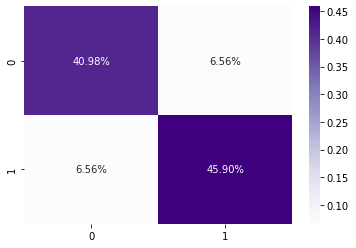

In [453]:
cm_svg=confusion_matrix(y_test,prediccion_svg)
sns.heatmap(cm_svg/np.sum(cm_svg),annot = True, fmt=  '0.2%',cmap ='Purples')

#### SRV kernel: poly

In [454]:
#Modelo
modelo_svm = SVC(kernel='poly', random_state = 42)
#Entrenamiento del modelo
modelo_svm.fit(X_train,y_train)
#Prediccion en base al training test
prediccion_svg=modelo_svm.predict(X_test)
#Accuracy obtenido
acc_svg=accuracy_score(y_test,prediccion_svg)
valor={"Modelo":"SVG_poly","Precision":acc_svg}
modelos=modelos.append(valor,ignore_index=True)
acc_svg

0.8688524590163934

<AxesSubplot:>

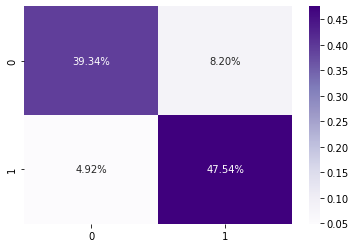

In [455]:
cm_svg=confusion_matrix(y_test,prediccion_svg)
sns.heatmap(cm_svg/np.sum(cm_svg),annot = True, fmt=  '0.2%',cmap ='Purples')

### Random Forest 

In [456]:
#Modelo
modelo_rf = RandomForestClassifier(n_estimators=300,min_samples_leaf=0.16, random_state=42)
#Entrenamiento del modelo
modelo_rf.fit(X_train,y_train)
#Prediccion en base al training test
prediccion_rf=modelo_rf.predict(X_test)
#Accuracy obtenido
acc_rf=accuracy_score(y_test,prediccion_rf)
valor={"Modelo":"Random Forest","Precision":acc_rf}
modelos=modelos.append(valor,ignore_index=True)
acc_rf

0.9016393442622951

<AxesSubplot:>

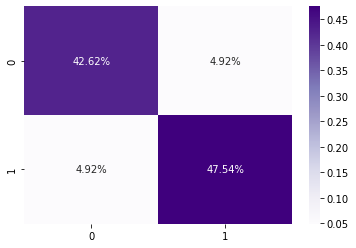

In [457]:
cm_rf=confusion_matrix(y_test,prediccion_rf)
sns.heatmap(cm_rf/np.sum(cm_rf),annot = True, fmt=  '0.2%', cmap ='Purples')

### KNN

In [458]:
#Modelo
knn =  KNeighborsClassifier(n_neighbors=17)
#Entrenamiento del modelo
knn.fit(X_train, y_train)
#Prediccion en base al training test
prediccion_knn=knn.predict(X_test)
#Accuracy obtenido
acc_knn=accuracy_score(y_test,prediccion_knn)
valor={"Modelo":"Knn","Precision":acc_knn}
modelos=modelos.append(valor,ignore_index=True)
acc_knn

C:\Users\Luis Fernando\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.8852459016393442

<AxesSubplot:>

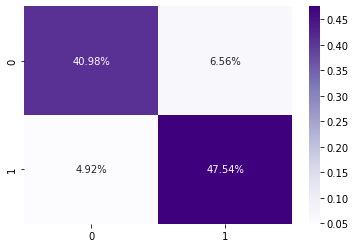

In [459]:
cm_knn=confusion_matrix(y_test,prediccion_knn)
sns.heatmap(cm_knn/np.sum(cm_knn),annot = True, fmt=  '0.2%', cmap ='Purples')

In [460]:
modelos.sort_values(by="Precision", ascending=False)

,Modelo,Precision
4,Random Forest,0.902
5,Knn,0.885
1,SVG_rbf,0.869
2,SVG_linear,0.869
3,SVG_poly,0.869
0,Regresion Logistica,0.836


## 4. Crossvalidation

In [461]:
#Seleccionamos solo los elementos numericos
#numeric_cols=[cname for cname in dataset.columns if dataset[cname].dtype in ['int64', 'float64']]
#numeric_cols
#En nuestro caso todos los elementos son numericos, sino tendriamos que seleccionar solo los elementos numericos.
#X= dataset[numeric_cols].copy()

#Asignacion de variable independientes
X=dataset_norm.drop('output', axis=1)
#Variable Objetivo
y=dataset_norm['output']
#X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,random_state=42)
print("Shape of input data: {} and shape of target variable: {}".format(X.shape, y.shape))
X.head()

Shape of input data: (303, 13) and shape of target variable: (303,)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,0.708,1,3,0.481,0.244,1,0,0.603,0,0.371,0,0,1
1,0.167,1,2,0.340,0.283,0,1,0.885,0,0.565,0,0,2
2,0.250,0,1,0.340,0.178,0,0,0.771,0,0.226,2,0,2
3,0.562,1,1,0.245,0.251,0,1,0.817,0,0.129,2,0,2
4,0.583,0,0,0.245,0.521,0,1,0.702,1,0.097,2,0,2


### Crossvalidation en base al (RMSE)

In [462]:
#Usemos cross_val_score para evaluar una puntuación mediante validación cruzada.
kf =KFold(n_splits=5, shuffle=True, random_state=42)
cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

Fold:1, Train set: 272, Test set:31
Fold:2, Train set: 272, Test set:31
Fold:3, Train set: 272, Test set:31
Fold:4, Train set: 273, Test set:30
Fold:5, Train set: 273, Test set:30
Fold:6, Train set: 273, Test set:30
Fold:7, Train set: 273, Test set:30
Fold:8, Train set: 273, Test set:30
Fold:9, Train set: 273, Test set:30
Fold:10, Train set: 273, Test set:30


In [463]:
#Analizaremos el rendimiento del modelo en función de la raíz del error cuadrático medio (RMSE).
def rmse(score):
    rmse = np.sqrt(-score)
    print(f'rmse= {"{:.2f}".format(rmse)}')

#### Evaluación de Random Forest

In [464]:
score = cross_val_score(ensemble.RandomForestRegressor(random_state= 42), X, y, cv= kf, scoring="neg_mean_squared_error")
print(f'Scores para cada fold son: {score}')
rmse(score.mean())

Scores para cada fold son: [-0.16140323 -0.08200968 -0.16504839 -0.14127    -0.1648     -0.11104667
 -0.17684    -0.15083667 -0.10306667 -0.10622   ]
rmse= 0.37


#### Ajuste del modelo

In [465]:
#A partir de 250 es un buen estimador !
estimators = [50, 100, 150, 200, 250]

for count in estimators:
    score = cross_val_score(ensemble.RandomForestRegressor(n_estimators= count, random_state= 42), X, y, cv= kf, scoring="neg_mean_squared_error")
    print(f'For estimators: {count}')
    rmse(score.mean())

For estimators: 50
rmse= 0.37
For estimators: 100
rmse= 0.37
For estimators: 150
rmse= 0.37
For estimators: 200
rmse= 0.37
For estimators: 250
rmse= 0.37


#### Evaluación de regresión Logistica

In [466]:
score = cross_val_score(LogisticRegression(), X, y, cv= kf, scoring="neg_mean_squared_error")
print(f'Scores para cada fold son: {score}')
rmse(score.mean())

Scores para cada fold son: [-0.22580645 -0.09677419 -0.25806452 -0.16666667 -0.13333333 -0.2
 -0.23333333 -0.16666667 -0.13333333 -0.13333333]
rmse= 0.42


### Crossvalidation en base al accuracy

#### Evaluación de Random Forest

In [467]:
score = cross_val_score(ensemble.RandomForestClassifier(random_state= 42), X, y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.74193548 0.93548387 0.74193548 0.86666667 0.86666667 0.83333333
 0.73333333 0.8        0.83333333 0.83333333]
Average score: 0.82


#### Ajustes del modelo

In [468]:
n_estimators = [50, 100, 150, 200, 250, 300]

for val in n_estimators:
    score = cross_val_score(ensemble.RandomForestClassifier(n_estimators= val, random_state= 42), X, y, cv= kf, scoring="accuracy")
    print(f'Average score({val}): {"{:.3f}".format(score.mean())}')

Average score(50): 0.809
Average score(100): 0.819
Average score(150): 0.822
Average score(200): 0.822
Average score(250): 0.825
Average score(300): 0.828


#### Evaluación de regresión Logistica

In [469]:
score = cross_val_score(LogisticRegression(), X, y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.77419355 0.90322581 0.74193548 0.83333333 0.86666667 0.8
 0.76666667 0.83333333 0.86666667 0.86666667]
Average score: 0.83


### Implementacion de LOO

In [484]:
loo = LeaveOneOut()
loo.get_n_splits(X)
crossvalidation = KFold(n_splits=5, random_state=42, shuffle=True)
scores = cross_val_score(modelo_rf, X, y, scoring="neg_mean_squared_error", cv=crossvalidation,
 n_jobs=1)
print("Folds: " + str(len(scores)) + ", MSE: " + str(np.mean(np.abs(scores))))

Folds: 5, MSE: 0.16180327868852457


In [493]:
loo = LeaveOneOut()
loo.get_n_splits(X)
crossvalidation = KFold(n_splits=10, random_state=42, shuffle=True)
scores = cross_val_score(modelo_rf, X, y, scoring="accuracy", cv=crossvalidation,
 n_jobs=1)
print("Folds: " + str(len(scores)) + ", MSE: " + str(np.mean(np.abs(scores))))

Folds: 10, MSE: 0.841182795698925


## 5. Metric Analysis

In [499]:
def evaluate_preds(y_true, y_preds):
  accuracy = accuracy_score(y_true, y_preds)
  precision = precision_score(y_true, y_preds)
  recall = recall_score(y_true, y_preds)
  f1 = f1_score(y_true, y_preds)
  print(f"Acc : {round(accuracy, 2) * 100:.2f}%")
  print(f"Precision : {round(precision, 2):.2f}")
  print(f"recall : {round(recall, 2):.2f}")
  print(f"F1 score {round(f1, 2):.2f}")

In [504]:
#Evaluacion del metodo selecciondo Random Forest
evaluate_preds(y_test,prediccion_rf)

Acc : 90.00%
Precision : 0.91
recall : 0.91
F1 score 0.91


In [501]:
#Evaluacion del metodo con menor presicion
evaluate_preds(y_test,prediccion)

Acc : 84.00%
Precision : 0.87
recall : 0.81
F1 score 0.84


### Roc curve

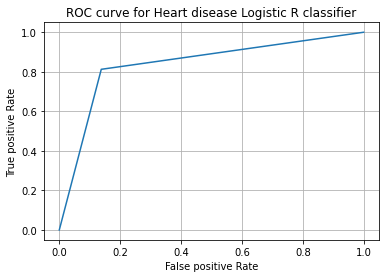

In [512]:
#Regresion Logistica
fpr, tpr, threshold = roc_curve(y_test, prediccion)
plt.plot(fpr, tpr)
plt.title('ROC curve for Heart disease Logistic R classifier')
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')
plt.grid(True)

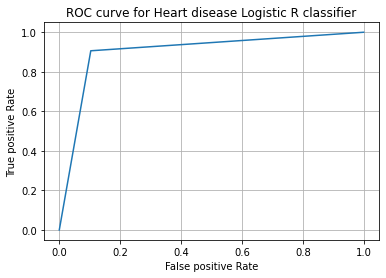

In [513]:
#Random Forest
fpr, tpr, threshold = roc_curve(y_test, prediccion_rf)
plt.plot(fpr, tpr)
plt.title('ROC curve for Heart disease Logistic R classifier')
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')
plt.grid(True)

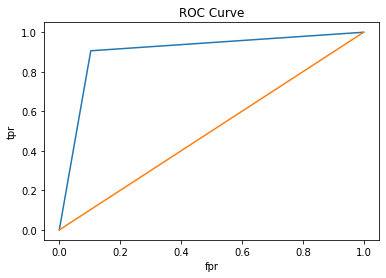

In [514]:
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0,1], [0,1])
ax.set(title="ROC Curve",
        xlabel="fpr",
        ylabel="tpr",)
plt.show()

### Classification_report

In [524]:
target_names = ['Padece de enfermedad', 'No padece de enfermedad']
print(classification_report(y_test,prediccion_rf,target_names=target_names))

                         precision    recall  f1-score   support

   Padece de enfermedad       0.90      0.90      0.90        29
No padece de enfermedad       0.91      0.91      0.91        32

               accuracy                           0.90        61
              macro avg       0.90      0.90      0.90        61
           weighted avg       0.90      0.90      0.90        61

